Example from https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
    
Train a simple deep CNN on the CIFAR10 small images dataset.

GPU run command with Theano backend (with TensorFlow, the GPU is automatically used):
    THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatx=float32 python cifar10_cnn.py

It gets down to 0.65 test logloss in 25 epochs, and down to 0.55 after 50 epochs.
(it's still underfitting at that point, though).

See this posting for a way to update the network to improve accuracy:

http://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [3]:
seed = 7
numpy.random.seed(seed)

batch_size = 32
num_classes = 10
epochs = 200
data_augmentation = True

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


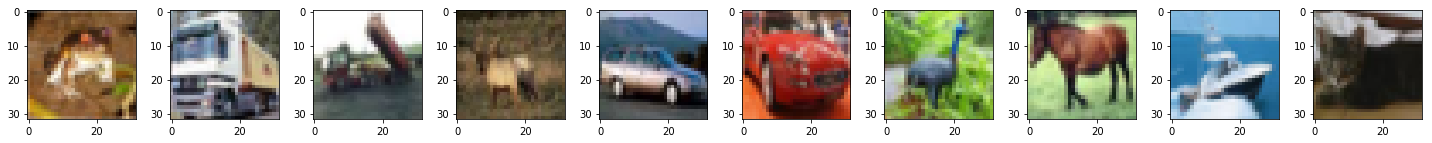

In [5]:
fig, ax = plt.subplots(1, 10, figsize=(20,3))
for i, a in enumerate(ax.flatten()):
    a.imshow(x_train[i])
fig.tight_layout()

Let's see examples from each of the 10 groups.

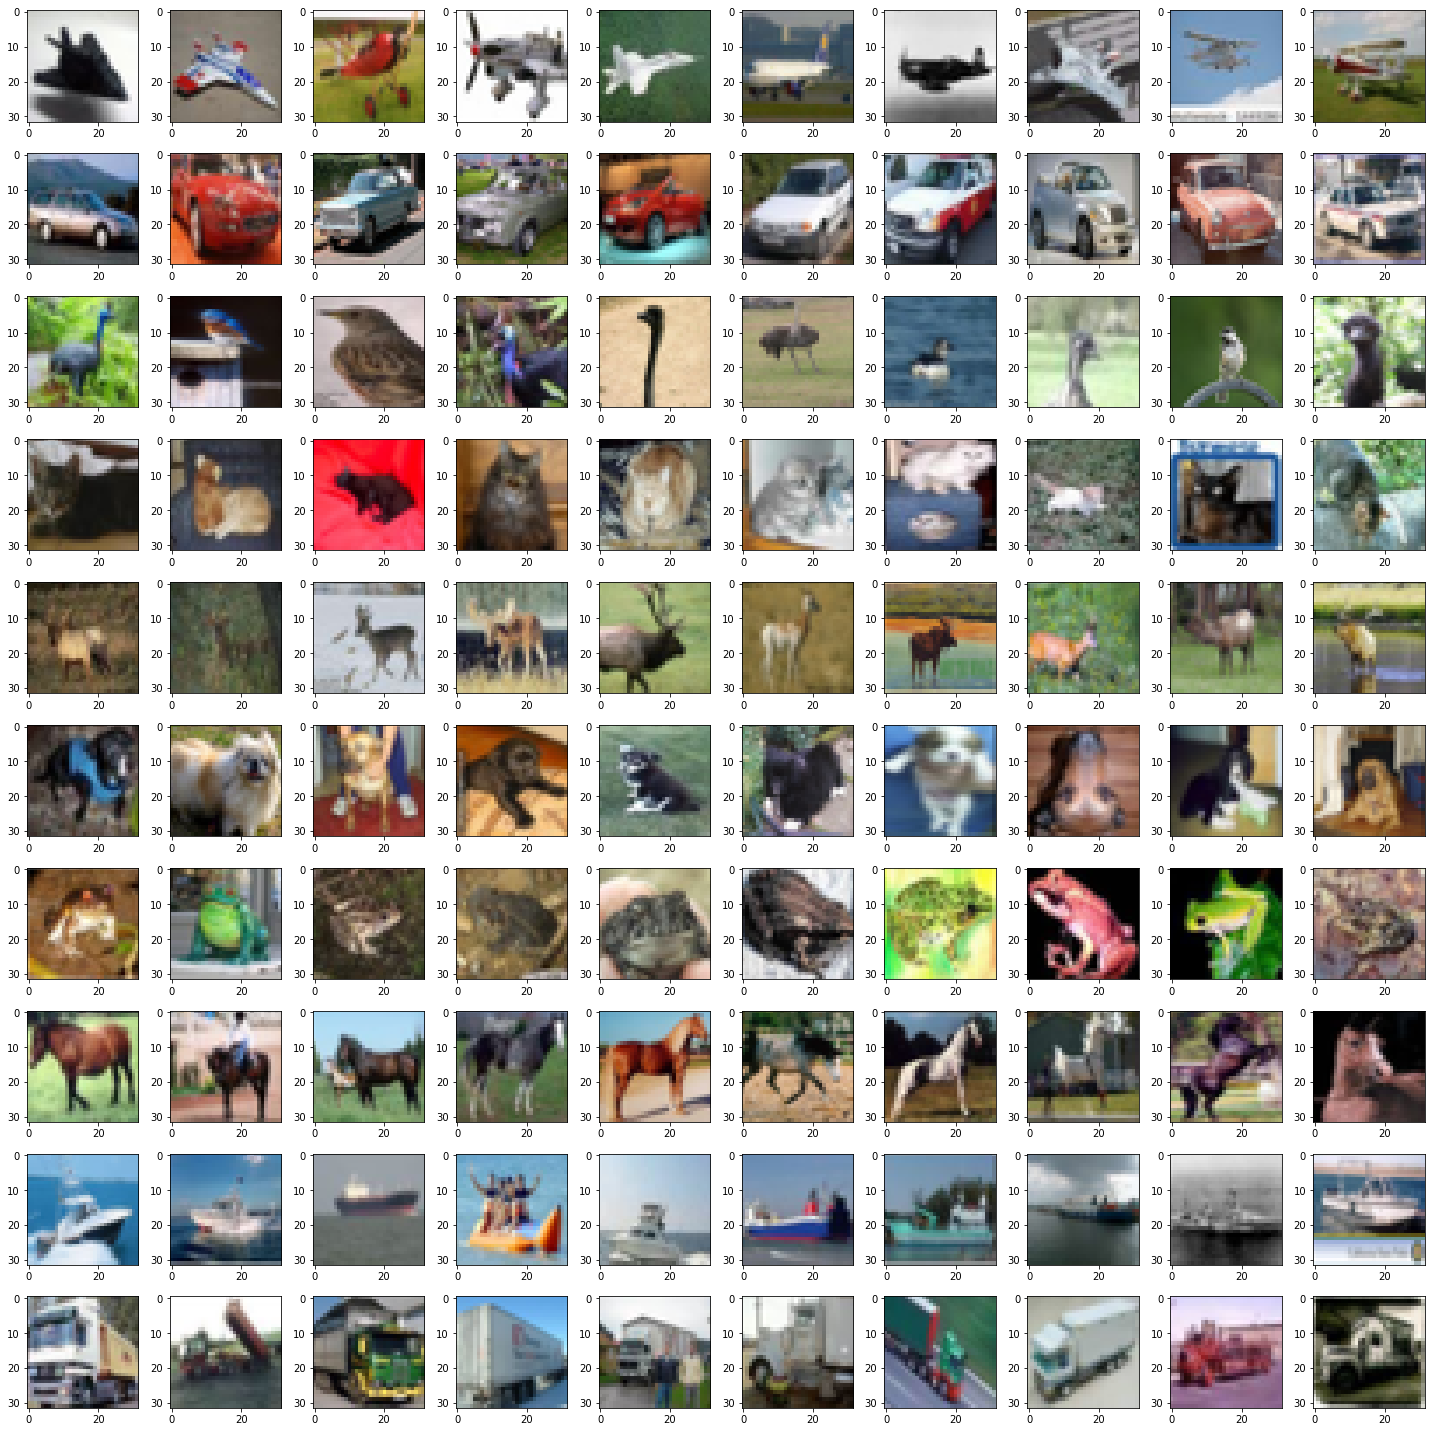

In [6]:
fig, ax = plt.subplots(10, 10, figsize=(20,20))
for i, a in enumerate(ax.flatten()):
    class_ind = i // 10
    pic_ind = i % 10
    group = np.where(y_train.flatten() == class_ind)[0][pic_ind]
    a.imshow(x_train[group])
fig.tight_layout()

In [7]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [9]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
# Turn off fitting when validation loss is not improving.
# See: https://keras.io/getting-started/faq/#how-can-i-interrupt-training-when-the-validation-loss-isnt-decreasing-anymore

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [12]:
if not data_augmentation:
    print('Not using data augmentation.')
    histry = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True, callbacks=[early_stopping])
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    histry = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        callbacks=[early_stopping])

Using real-time data augmentation.
Epoch 1/200
1562/1562 [==============================] - 54s - loss: 1.8320 - acc: 0.3262 - val_loss: 1.5224 - val_acc: 0.4588
Epoch 2/200
1562/1562 [==============================] - 44s - loss: 1.5466 - acc: 0.4336 - val_loss: 1.3645 - val_acc: 0.5072
Epoch 3/200
1562/1562 [==============================] - 44s - loss: 1.4281 - acc: 0.4842 - val_loss: 1.2667 - val_acc: 0.5515
Epoch 4/200
1562/1562 [==============================] - 44s - loss: 1.3499 - acc: 0.5151 - val_loss: 1.2398 - val_acc: 0.5546
Epoch 5/200
1562/1562 [==============================] - 44s - loss: 1.2781 - acc: 0.5428 - val_loss: 1.1042 - val_acc: 0.6112
Epoch 6/200
1562/1562 [==============================] - 44s - loss: 1.2229 - acc: 0.5677 - val_loss: 1.0410 - val_acc: 0.6364
Epoch 7/200
1562/1562 [==============================] - 44s - loss: 1.1737 - acc: 0.5845 - val_loss: 1.0394 - val_acc: 0.6345
Epoch 8/200
1562/1562 [==============================] - 44s - loss: 1.1306 

In [14]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

 9856/10000 [============================>.] - ETA: 0sTest loss: 0.673320632076
Test accuracy: 0.7764


In [22]:
from sklearn import datasets, svm, metrics
(_, _), (_, y_test_orig) = cifar10.load_data()
pred = model.predict_classes(x_test)
print(pred.shape, y_test_orig.shape)
print(np.mean(pred == y_test_orig.flatten()))
print(metrics.classification_report(y_test_orig.flatten(), pred))

 9824/10000 [============================>.] - ETA: 0s0.4883
             precision    recall  f1-score   support

          0       0.40      0.87      0.55      1000
          1       0.94      0.52      0.67      1000
          2       0.85      0.05      0.10      1000
          3       0.42      0.23      0.30      1000
          4       0.74      0.11      0.20      1000
          5       0.66      0.30      0.41      1000
          6       0.76      0.52      0.61      1000
          7       0.29      0.89      0.43      1000
          8       0.73      0.52      0.60      1000
          9       0.55      0.87      0.68      1000

avg / total       0.63      0.49      0.46     10000



Let's look at what the first group of images is made of...

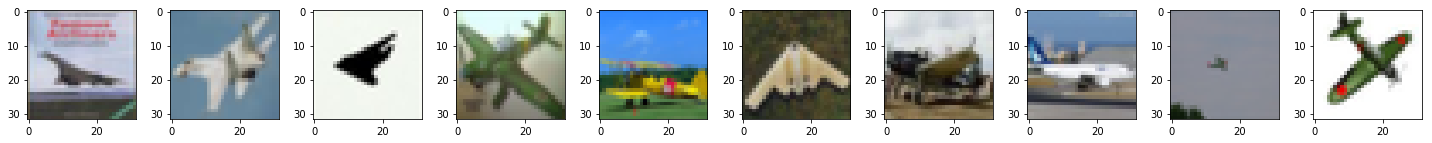

In [16]:
class_ind = 0
first_group = np.where(y_test.flatten() == class_ind)[0][:10]
fig, ax = plt.subplots(1, 10, figsize=(20,3))
for i, a in enumerate(ax.flatten()):
    a.imshow(x_test[first_group[i]])
fig.tight_layout()

OK, it's airplanes! Let's see what the nnet did...

 9920/10000 [============================>.] - ETA: 0s

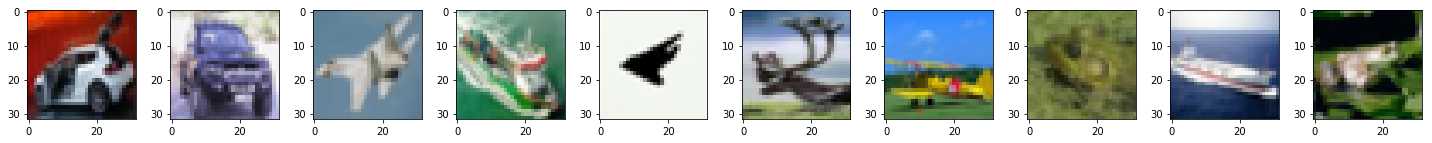

In [17]:
first_group = np.where(pred.flatten() == class_ind)[0][:10]
fig, ax = plt.subplots(1, 10, figsize=(20,3))
for i, a in enumerate(ax.flatten()):
    a.imshow(x_test[first_group[i]])
fig.tight_layout()

Not too bad. There's deer, some other animal, and a couple of boats in there. Let's see some examples that it got wrong.

In [18]:
print(np.mean(pred != y_test.flatten()))
inds = np.where(pred != y_test.flatten())[0]
print(inds[:10], '\n', pred[inds][:10], '\n', y_test.flatten()[inds][:10])

0.5117
[ 3  6  7  8  9 12 15 16 22 24] 
 [8 0 9 7 0 7 0 7 3 7] 
 [0 1 6 3 1 5 8 5 4 5]


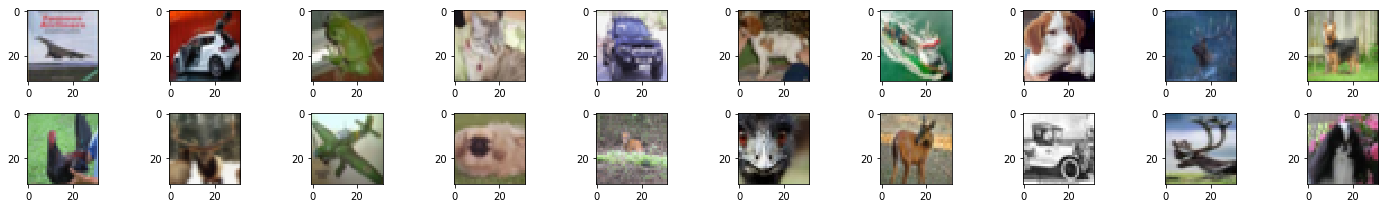

In [19]:
fig, ax = plt.subplots(2, 10, figsize=(20,3))
for i, a in enumerate(ax.flatten()):
    a.imshow(x_test[inds[i]])
fig.tight_layout()